# LAB12
## 

In [78]:
import torch
import torchvision
x = torch.zeros(3, 2)
print(x)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [79]:
### Read flattened, processed data
import pandas as pd
fash_mnist = pd.read_csv("https://remiller1450.github.io/data/fashion_mnist_train.csv")

## Train-test split
from sklearn.model_selection import train_test_split
train_fash, test_fash = train_test_split(fash_mnist, test_size=0.1, random_state=5)

### Separate the label column (outcome)
train_y = train_fash['y']
train_X = train_fash.drop(['y'], axis=1)
test_y = test_fash['y']
test_X = test_fash.drop(['y'], axis=1)

### Convert to numpy array then reshape to 900 by 28 by 28
mnist_unflattened = train_X.to_numpy()
mnist_unflattened = mnist_unflattened.reshape(900,28,28)

## Convert to tensor
mnist_tensor = torch.from_numpy(mnist_unflattened)

## Check shape of the first image
print(mnist_tensor[0,:,:].shape)

torch.Size([28, 28])


C:\Users\kimin\AppData\Local\Temp\ipykernel_4296\440719575.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(mnist_unflattened[8,:,:])
c:\Users\kimin\.conda\envs\ski_env\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


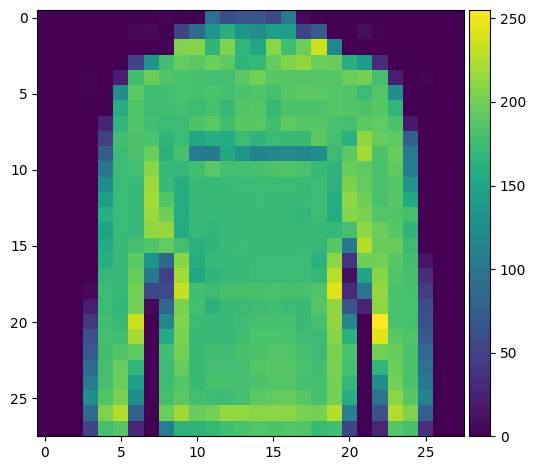

In [80]:
from skimage import io
io.imshow(mnist_unflattened[8,:,:])
# print(mnist_tensor[8,:,:]) ## Print if you'd like to see the tensor format


C:\Users\kimin\AppData\Local\Temp\ipykernel_4296\3695643181.py:3: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  my_img = io.imread(
C:\Users\kimin\AppData\Local\Temp\ipykernel_4296\3695643181.py:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(my_img)
C:\Users\kimin\AppData\Local\Temp\ipykernel_4296\3695643181.py:9: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


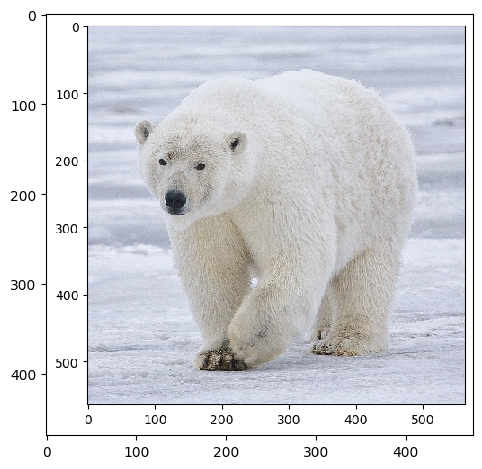

In [81]:
from skimage import io

my_img = io.imread(
    r"C:\Users\kimin\Documents\STA395\polarbear.png",
    plugin='pil',          # use PIL backend (safer)
)

io.imshow(my_img)
io.show()


Shape: (469, 475, 4)


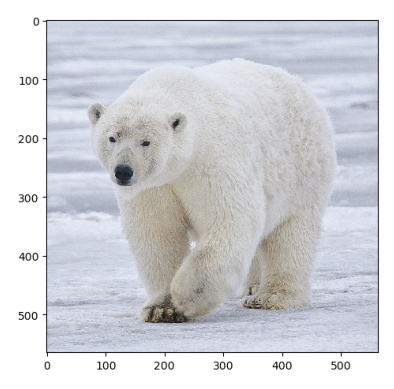

In [82]:
import matplotlib.pyplot as plt
from skimage import io

img = io.imread("C:\\Users\\kimin\\Documents\\STA395\\polarbear.png")

print("Shape:", img.shape)

plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()


In [83]:
## Convert to tensor and check the shape
polar_bear = torch.from_numpy(my_img)
print(polar_bear.shape)

## Move third dimension (color channels) to the first dimension
polar_bear2 = torch.movedim(polar_bear, source=2, destination=0)
print(polar_bear2.shape)

## Add an empty first dimension, putting our tensor into the standard format
polar_bear_final = torch.unsqueeze(polar_bear2, dim=0)
print(polar_bear_final.shape)

torch.Size([469, 475, 4])
torch.Size([4, 469, 475])
torch.Size([1, 4, 469, 475])


In [84]:
from torch.nn import functional 
polar_bear_resized = functional.interpolate(polar_bear_final, size = (128,128))
print(polar_bear_resized.shape)

torch.Size([1, 4, 128, 128])


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

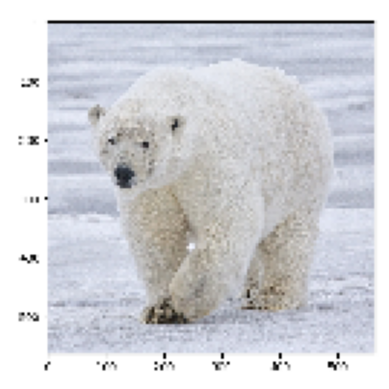

In [85]:
import matplotlib.pyplot as plt
polar_img_format = torch.movedim(polar_bear_resized[0], source=0, destination=2)
plt.imshow(polar_img_format)
plt.axis("off")

In [86]:
from torchvision import transforms
from PIL import Image
transformed = transforms.ToPILImage()
transformed(polar_bear_resized[0]).save('polar_bear1.png')

### Q1


Shape: (469, 475, 4)


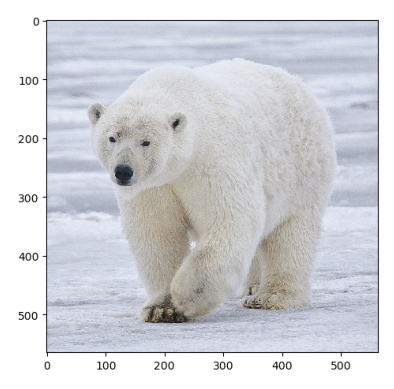

In [87]:
#### Part A

import matplotlib.pyplot as plt
from skimage import io

my_cat = io.imread("C:\\Users\\kimin\\Documents\\STA395\\cats\\cat.0.jpg")


print("Shape:", img.shape)

plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()


In [88]:
#### Part B
import torch

cat_tensor = torch.from_numpy(my_cat)
print(cat_tensor.shape) 

cat_tensor2 = torch.movedim(cat_tensor, source=2, destination=0)
print(cat_tensor2.shape)


cat_final = torch.unsqueeze(cat_tensor2, dim=0)
print(cat_final.shape)


torch.Size([374, 500, 3])
torch.Size([3, 374, 500])
torch.Size([1, 3, 374, 500])


In [89]:
#### Part C
from torch.nn import functional

cat_resized = functional.interpolate(cat_final, size=(64, 64))
print(cat_resized.shape)


torch.Size([1, 3, 64, 64])


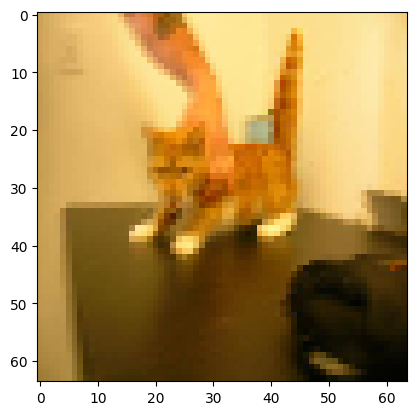

In [90]:
#### Part D

import matplotlib.pyplot as plt

cat_img_format = torch.movedim(cat_resized[0], source=0, destination=2)

plt.imshow(cat_img_format)
plt.show()


### Q2

#### Part A

It has 2 hidden layers:

1. nn.Linear(784, 512), followed by ReLU; hidden layer #1

2. nn.Linear(512, 512), followed by ReLU; hidden layer #2

3. nn.Linear(512, 10), output layer

Hidden layers are all the fully connected layers between the input and the final output, 
so only the first two linear layers count.

#### Part B

If we remove the flattening, the algorithm will break because
it expects each image to be transformed from 28x28 pixels into a 784-length vector.

Without flattening, the tensor is still shaped like (N, 28, 28).


#### Part C

A 10-dimensional output lets the model assign a score to each of the 10 possible labels.

During training, these scores are used with a loss function (like cross-entropy) to decide which class the model believes is most likely.

So the output size matches the number of possible categories the model needs to classify.

### Q3
First linear layer: nn.Linear(784, 512)

Second linear layer: nn.Linear(512, 512)

Output layer: nn.Linear(512, 10)


Total weights = 784x512 + 512x512 + 262,144 + 512x10 = 668672


Total biases = 512+512+10=1034

So the network has:

### Q4

In [91]:
#### Part A

import numpy as np
import matplotlib.pyplot as plt
import os

path = "C:/Users/kimin/Documents/STA395/cats_dogs/"
img_names = os.listdir(path)

images = np.empty(shape = (150, 64, 64, 3))
for idx, name in enumerate(img_names):
    img_name = path + name
    image = plt.imread(img_name)
    images[idx] = image


classes = [1, 0]

labels = np.repeat(classes, [50, 100], axis=0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    images,
    labels,
    test_size = 0.25,
    random_state = 5
)

images[0].shape


(64, 64, 3)

In [92]:
#### Part B

from torch import nn


class catdog_net(nn.Module):
    
    def __init__(self):
        super(catdog_net, self).__init__()
        
        self.flatten = nn.Flatten()
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(64*64*3, 256), # size of images has to match
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2) # 2 classes
        )

    def forward(self, x):
        x = self.flatten(x)
        scores = self.linear_relu_stack(x)
        return scores


net = catdog_net()


In [93]:
#### Part C

from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.from_numpy(X_train).type(torch.FloatTensor)
y_train_tensor = torch.from_numpy(y_train).type(torch.LongTensor)


X_test_tensor = torch.from_numpy(X_test).type(torch.FloatTensor)
y_test_tensor = torch.from_numpy(y_test).type(torch.LongTensor)


batch_size = 20


train_loader = DataLoader(
    TensorDataset(X_train_tensor, y_train_tensor),
    batch_size = batch_size
)

test_loader = DataLoader(
    TensorDataset(X_test_tensor, y_test_tensor),
    batch_size = batch_size
)


In [94]:
#### Part D

epochs = 10
learning_rate = 0.01


cost_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(), lr = learning_rate)


track_cost = np.zeros(epochs)
cur_cost = 0


for epoch in range(epochs):
    
    cur_cost = 0

    for i, data in enumerate(train_loader, 0):
        
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        cost = cost_fn(nn.Softmax(dim=1)(outputs), labels)
        
        cost.backward()
        optimizer.step()
        cur_cost += cost.item()
    
    track_cost[epoch] = cur_cost



In [ ]:
#### Part E

correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:

        images_batch, labels_batch = data
        
        outputs = net(images_batch)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels_batch.size(0)
        
        correct += (predicted == labels_batch).sum().item()

print(correct / total)


0.6842105263157895
